<a href="https://colab.research.google.com/github/5234560002ebnida/nonfictioner/blob/main/accumulation_distribution_portforlio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Timeframe: day


/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


              Close            AD
Date                             
2012-05-21  53600.0 -1.897380e+05
2012-05-22  54800.0 -7.073900e+04
2012-05-23  53800.0 -1.185560e+05
2012-05-24  53700.0 -1.694568e+05
2012-05-25  55100.0 -2.451788e+04
...             ...           ...
2024-07-22  48000.0  2.699068e+07
2024-07-23  47350.0  2.685129e+07
2024-07-24  46250.0  2.673801e+07
2024-07-25  46500.0  2.666179e+07
2024-07-26  47450.0  2.667464e+07

[3000 rows x 2 columns]


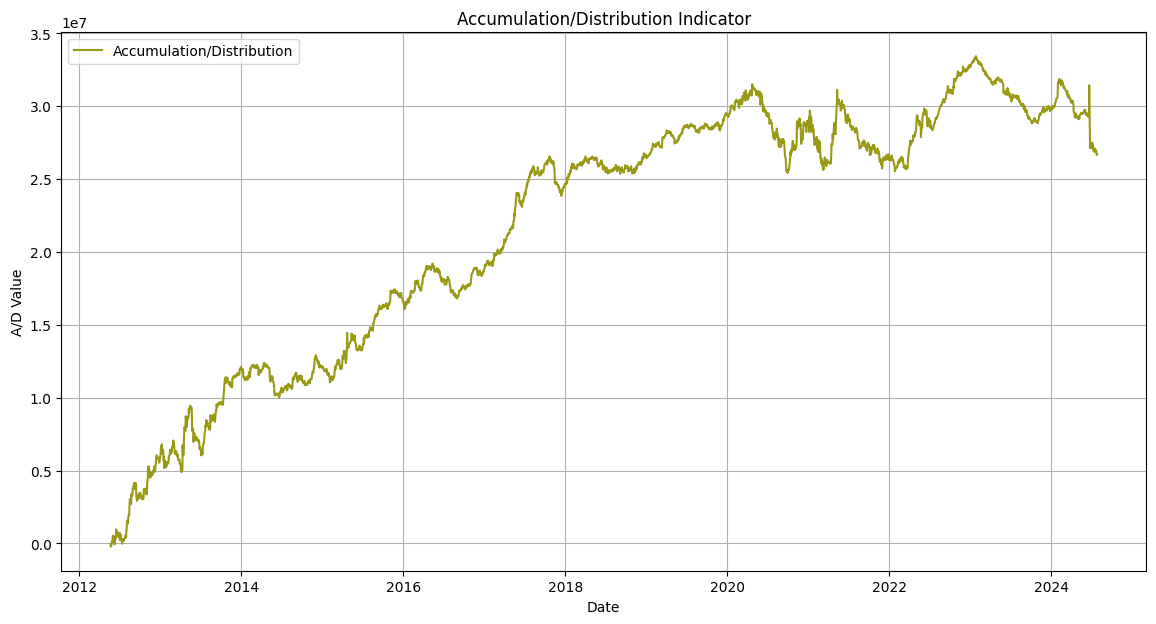


Timeframe: week


/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


              Close            AD
Date                             
2004-08-06  23400.0 -3.717346e+06
2004-08-13  22950.0 -6.160062e+06
2004-08-20  22200.0 -5.822454e+06
2004-08-27  22300.0 -3.815552e+06
2004-09-03  21500.0 -6.987674e+06
...             ...           ...
2024-06-28  46900.0  7.150800e+07
2024-07-05  48300.0  7.212702e+07
2024-07-12  46400.0  7.174213e+07
2024-07-19  47900.0  7.166808e+07
2024-07-26  47450.0  7.172635e+07

[1042 rows x 2 columns]


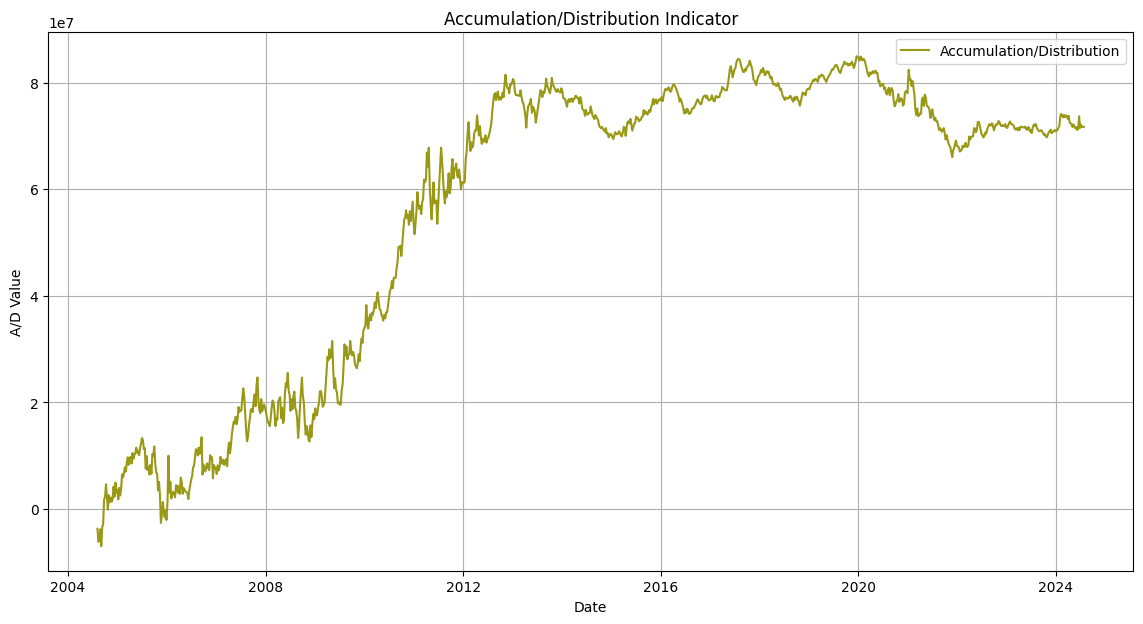


Timeframe: month


/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


              Close            AD
Date                             
2004-08-31  21600.0 -2.463166e+07
2004-09-30  24650.0  2.642488e+06
2004-10-29  23800.0 -5.599227e+06
2004-11-30  22550.0 -5.232013e+06
2004-12-30  22400.0 -5.232013e+06
...             ...           ...
2024-03-29  48250.0 -8.780758e+06
2024-04-30  44900.0 -1.020182e+07
2024-05-31  43600.0 -1.087298e+07
2024-06-28  46900.0 -1.553125e+07
2024-07-26  47450.0 -1.516192e+07

[240 rows x 2 columns]


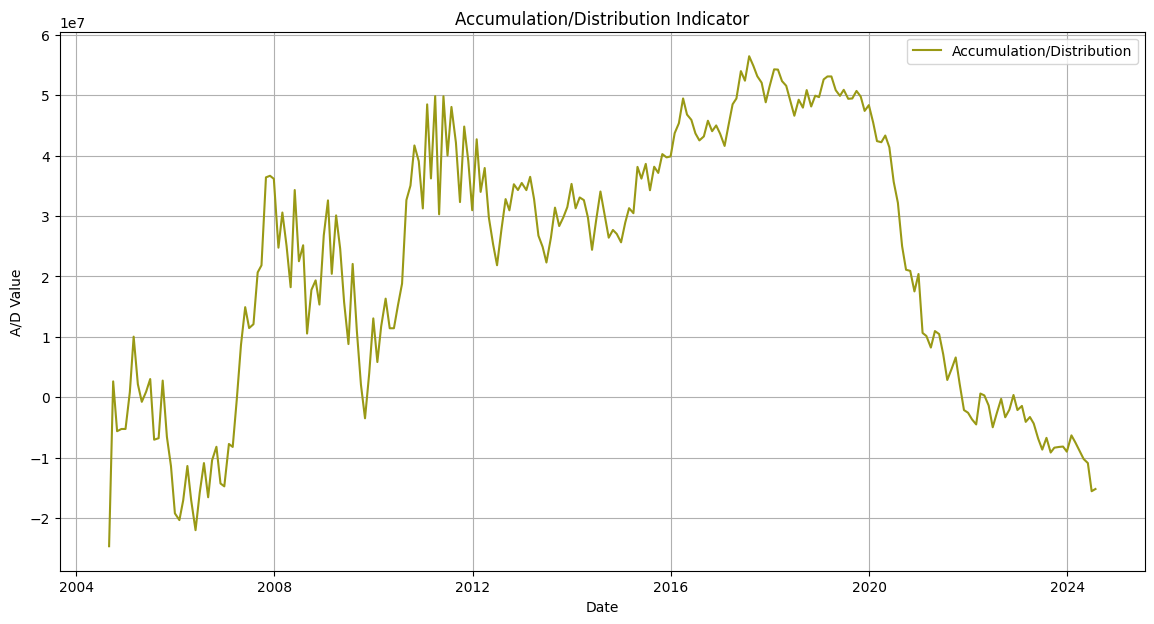

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def get_price(symbol, startTime, endTime, timeframe='day'):
    count = 3000
    url = f"https://fchart.stock.naver.com/sise.nhn?symbol={symbol}&timeframe={timeframe}&count={count}&requestType=0"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    data = []
    items = soup.select('item')
    for item in items:
        row = item['data'].split('|')
        data.append(row)

    df = pd.DataFrame(data, columns=columns)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df.astype(float)

def calculate_ad(data):
    data['AD'] = (2 * data['Close'] - data['Low'] - data['High']) / (data['High'] - data['Low']) * data['Volume']
    data['AD'] = data['AD'].cumsum()
    return data

def plot_ad(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['AD'], label='Accumulation/Distribution', color='#999915')
    plt.title(f"Accumulation/Distribution Indicator")
    plt.xlabel('Date')
    plt.ylabel('A/D Value')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# 사용 예시
symbol = '078930'  # GS종목코드
startTime = '20220501'
endTime = '20220518'

timeframes = ['day', 'week', 'month']
for timeframe in timeframes:
    print(f"\nTimeframe: {timeframe}")
    df = get_price(symbol, startTime, endTime, timeframe)
    df = calculate_ad(df)
    print(df[['Close', 'AD']])
    plot_ad(df)